In [ ]:
using Plots, DifferentialEquations, SpecialFunctions, FastGaussQuadrature, LinearAlgebra, ForwardDiff, Interact

## The ODE Method

In [13]:
function tracywidomODE!(du,u,p,t) # p is not used
    du .= [u[2], t*u[1] + 2*u[1]^3, u[4], u[1]^2]
end

tracywidomODE! (generic function with 1 method)

In [3]:
t0,tn = 5.0,-8.0
u0 = [airy(t0), airy(1, t0), 0, airy(t0)^2]
prob = ODEProblem(tracywidomODE!, u0, (t0,tn))
sol = solve(prob,Tsit5(), reltol=1e-14, abstol=1e-14)
f(t,I,I′) = (t, -I′*exp(-I))

TracyWidomPDF_via_ODE(t) = f(t, sol(t)[[3,4]]...)[2]

TracyWidomPDF_via_ODE (generic function with 1 method)

## The Fredholm Determinant Method

In [5]:
airy_kernel(x, y) = x==y ? (airyaiprime(x))^2 - x * (airyai(x))^2 :
           (airyai(x) * airyaiprime(y) - airyai(y) * airyaiprime(x)) / (x - y)
ϕ(ξ, s) =  s + 10*tan(π*(ξ+1)/4) # Transformation from [-1,1] to (s,∞)
ϕ′(ξ) = (5π/2)*(sec(π*(ξ+1)/4))^2
K(ξ,η,s) = sqrt(ϕ′(ξ) * ϕ′(η)) * airy_kernel(ϕ(ξ,s), ϕ(η,s))

function K(s , n=100) 
    nodes,weights = gausslegendre(n)
    Symmetric( K.(nodes',nodes,s) .* (√).(weights) .* (√).(weights'))
end

TracyWidomPDF_via_Fredholm_Det(s) = ForwardDiff.derivative( t->det(I-K(t)),s)

TracyWidomPDF_via_Fredholm_Det (generic function with 1 method)

## Comparing the Two

In [15]:
@manipulate for t=-8:.01:5
    [TracyWidomPDF_via_ODE(t), TracyWidomPDF_via_Fredholm_Det(t) ]
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["t"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 1301,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
651, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/alanedelman/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/alanedelman/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/alanedelman/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/Users/alanedelman/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/Users/alanedelman/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001350f0d90, Task (runnable) @0x00000001350f0d90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-8.0\",\"-7.99\",\"-7.98\",\"-7.97\",\"-7.96\",\"-7.95\",\"-7.94\",\"-7.93\",\"-7.92\",\"-7.91\",\"-7.9\",\"-7.89\",\"-7.88\",\"-7.87\",\"-7.86\",\"-7.85\",\"-7.84\",\"-7.83\",\"-7.82\",\"-7.81\",\"-7.8\",\"-7.79\",

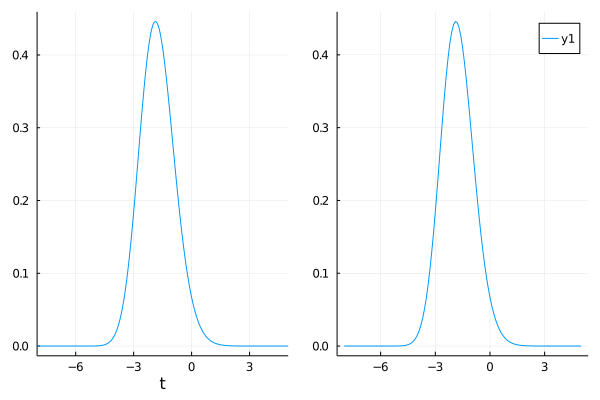

In [16]:
pODE = plot(sol, vars=(f,0,3,4), flip=false, legend=false)
pDet = plot( -8:.1:5, TracyWidomPDF_via_Fredholm_Det)
plot(pODE, pDet)

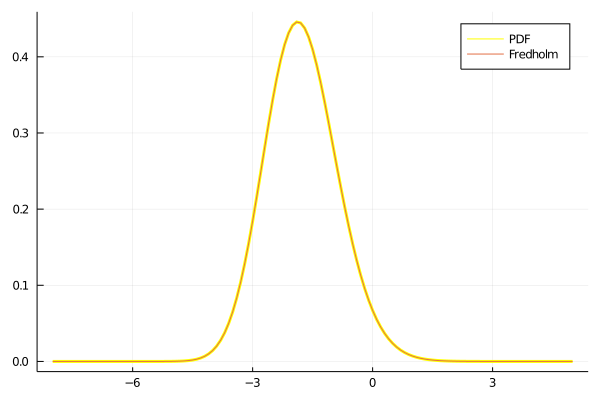

In [17]:
plot(-8:.1:5, TracyWidomPDF_via_ODE, lw=3, color=:yellow, label="PDF")
plot!(-8:.1:5, TracyWidomPDF_via_Fredholm_Det, label="Fredholm" )

## Monte Carlo

In [18]:
using StatsBase

In [23]:
t = 10_000
e = fill(0.0,t)
n = 100
@time for i = 1:t
    A = ( randn(n,n) + im * randn(n,n))
    e[i] = eigmax(Hermitian( A+A'))   ## Random Matrices from the GUE, and take eigmax
end
e .=   (e/2 .- 2*√n) * n^(1/6) # normalize
h = fit(Histogram, e, -8:.125:5);

  7.668592 seconds (288.98 k allocations: 8.233 GiB, 2.42% gc time)


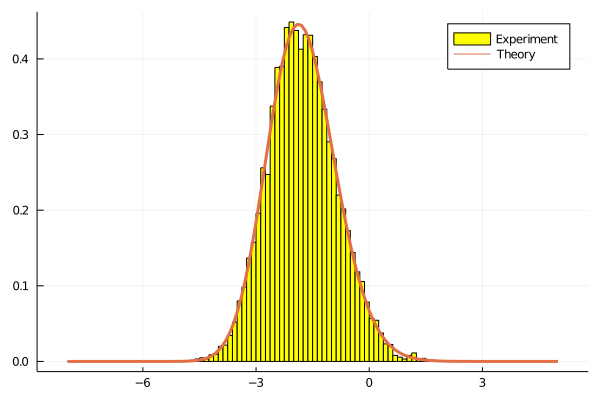

In [24]:
plot(normalize(h),color=:yellow, label="Experiment")
plot!( -8:.1:5, t -> TracyWidomPDF_via_ODE(t),lw=3, label="Theory")

## Numerical Difference

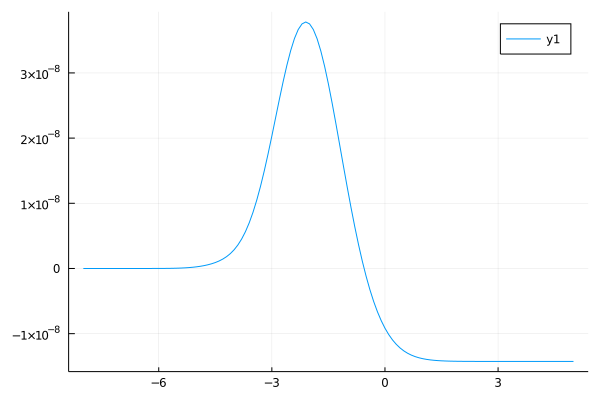

In [21]:
plot( -8:.1:5, t -> TracyWidomPDF_via_ODE(t) -  TracyWidomPDF_via_Fredholm_Det(t) )